# Test Model
---
Test the trained paramterized neural network for diffent edge cases and look at its performance.

### Import Modules

In [1]:
# extern modules
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

# intern modules
from PNN_model_2d import ParameterizedNeuralNet

## 1) Load the Model

In [2]:
# path to file
PATH: str = "../trained_models/PNN_2d.pth"

# load model from 
model = ParameterizedNeuralNet()
PNN_state_dict = torch.load(PATH)
model.load_state_dict(PNN_state_dict)

<All keys matched successfully>

## 2) Test Some Examples of th PNN

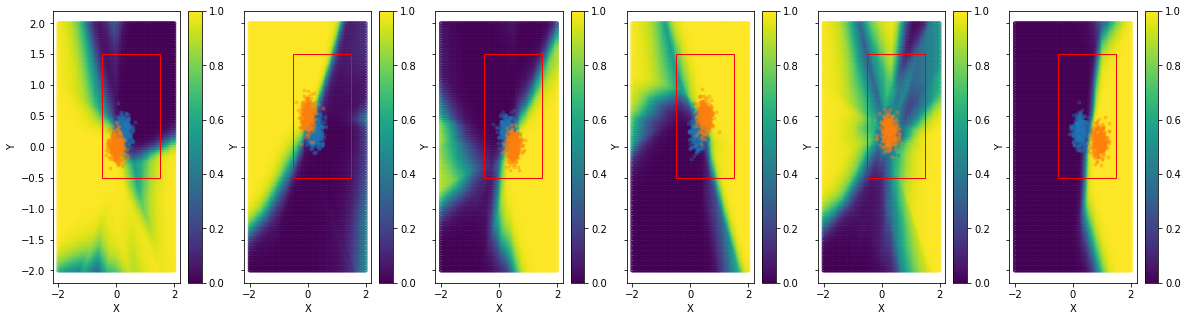

In [3]:
# covariances
cov = np.eye(2) * 0.02

# sizes
sizes = 300

# generating the coordinate system
x_data = np.linspace(-2, 2, 100)
y_data = np.linspace(-2, 2, 100)
coordinates = np.array([[x, y] for x in x_data for y in y_data])

# choosing the background to be at [1,1]
bg_mean = [0.25, 0.25]
background = np.multiply(np.ones_like(coordinates), np.array(bg_mean))
data = np.zeros((100**2, 6))

# different signals
signals = [[0, 0], [0, 0.5], [0.5, 0], [0.5, 0.5], [0.25, 0.25], [0.9, 0.1]]

# defining the plots
fig, axes = plt.subplots(ncols=len(signals), sharey=True)
fig.set_figheight(5)
fig.set_figwidth(20)

# rectangle to mark region of parameterization
rects = [patches.Rectangle((-0.5, -0.5), 2.0, 2.0, linewidth=1, edgecolor="red", facecolor='none') for _ in range(len(signals))]

# iterating through the signals

for signal_idx, signal in enumerate(signals):
    data[:, 0:2] = coordinates
    data[:, 2:4] = background
    data[:, 4:6] = np.multiply(np.ones_like(coordinates), np.array(signal))

    res = model(torch.Tensor(data)).detach().numpy()


    pl = axes[signal_idx].scatter(coordinates[:,0],coordinates[:,1], marker = '.', facecolor = 'none', edgecolor = plt.get_cmap('viridis')(res))
    example = [np.random.multivariate_normal(bg_mean, cov, size=sizes), np.random.multivariate_normal(signal, cov, size=sizes)]
    axes[signal_idx].scatter(example[0][:,0], example[0][:, 1], marker=".", alpha=0.3)
    axes[signal_idx].scatter(example[1][:,0], example[1][:, 1], marker=".", alpha=0.3)
    axes[signal_idx].add_patch(rects[signal_idx])
    axes[signal_idx].set_xlabel("X")
    axes[signal_idx].set_ylabel("Y")
    plt.colorbar(pl, ax=axes[signal_idx])
plt.show()